# Descriptive statistics | Wine Dataset

In [16]:
import os
import urllib.request

dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
dataset_path = "winequality-red.csv"

if not os.path.exists(dataset_path):
    try:
        print("Descargando dataset Wine de la web UCI...")
        urllib.request.urlretrieve(dataset_url, dataset_path)
        print("Dataset Wine descargado exitosamente.")
    except Exception as e:
        print(f"Error al descargar dataset: {e}")
else:
    print("Dataset Wine fue localizado localmente.")

Dataset Wine fue localizado localmente.


In [5]:
import pandas as pd

df_raw = pd.read_csv(dataset_path, sep=';')
df_raw.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
print(f"Info de dataset Wine, Columnas: {df_raw.shape[1]}, Filas: {df_raw.shape[0]}")

Info de dataset Wine, Columnas: 12, Filas: 1599


In [ ]:
print(f"Columnas del dataset: {df_raw.columns}")
print()
print(df_raw.info())

columnas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   f

## Calidad del vino

### Medidas de tendencia central

In [86]:
# Análisis con base a la columna de 'quality' calidad del vino.
media_qa = df_raw['quality'].mean()
mediana_qa = df_raw['quality'].median()
moda_qa = df_raw['quality'].mode().iloc[0]

print(f"Medidas de tendencia central para la columna 'quality':")
print(f"Media: {media_qa:.3f}")
print(f"Mediana: {mediana_qa:.3f}")
print(f"Moda: {moda_qa:.3f}")

Medidas de tendencia central para la columna 'quality':
Media: 5.636
Mediana: 6.000
Moda: 5.000


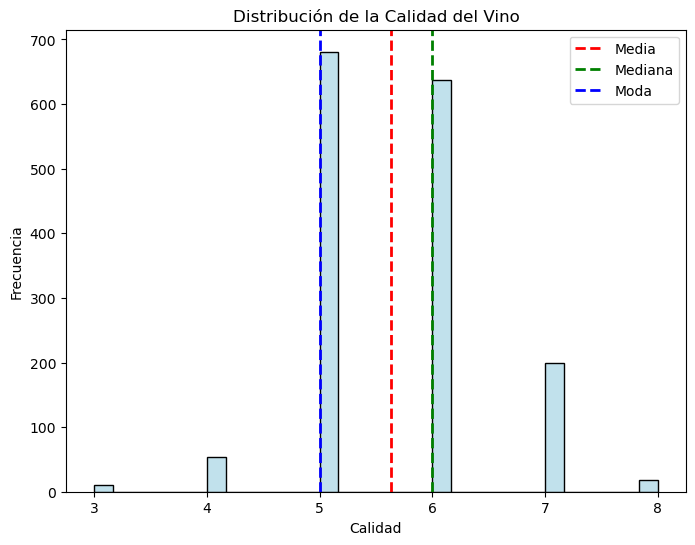

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df_raw['quality'], bins=30, color='lightblue')
plt.axvline(media_qa, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mediana_qa, color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(moda_qa, color='blue', linestyle='dashed', linewidth=2, label='Moda')
plt.legend(['Media', 'Mediana', 'Moda'])
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

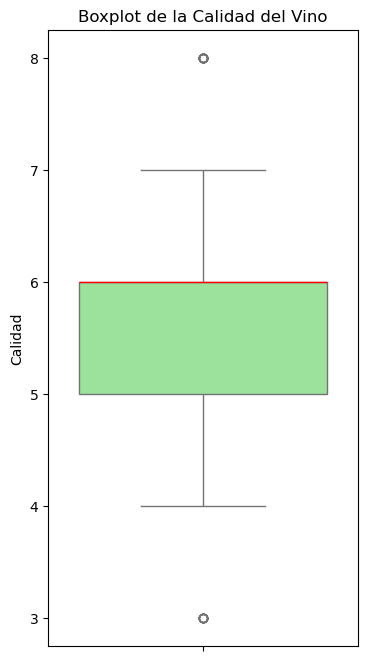

In [84]:
# Gráfica de caja vertical
plt.figure(figsize=(4, 8))
sns.boxplot(y=df_raw['quality'], color='lightgreen', orient='y', medianprops={'color': 'red'})
plt.title('Boxplot de la Calidad del Vino')
plt.ylabel('Calidad')
plt.show()

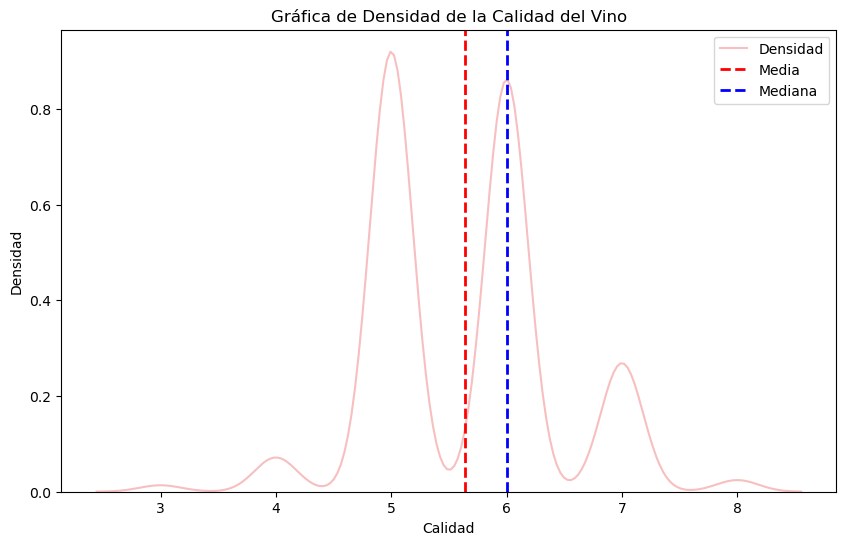

In [88]:
# Gráfica de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df_raw['quality'], fill=False, color='lightcoral', alpha=0.5)
plt.axvline(media_qa, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mediana_qa, color='blue', linestyle='dashed', linewidth=2, label='Mediana')
plt.title('Gráfica de Densidad de la Calidad del Vino')
plt.legend(['Densidad', 'Media', 'Mediana'])
plt.xlabel('Calidad')
plt.ylabel('Densidad')
plt.show()

### Medidas de dispersión

In [106]:
min_qa = df_raw['quality'].min()
max_qa = df_raw['quality'].max()
range_qa = max_qa - min_qa
variance_qa = df_raw['quality'].var()
std_dev_qa = df_raw['quality'].std()
q3_qa = df_raw['quality'].quantile(0.75)
q1_qa = df_raw['quality'].quantile(0.25)
iqr_qa = q3_qa - q1_qa
print(f"Medidas de dispersión para la columna 'quality':")
print(f"Mínimo: {min_qa:.2f}, Máximo: {max_qa:.2f}, Rango: {range_qa:.2f}")
print(f"Varianza: {variance_qa:.2f}, Desv. Estándar: {std_dev_qa:.2f}")
print(f"Q1: {q1_qa:.2f}, Q3: {q3_qa:.2f}, IQR: {iqr_qa:.2f}")

Medidas de dispersión para la columna 'quality':
Mínimo: 3.00, Máximo: 8.00, Rango: 5.00
Varianza: 0.65, Desv. Estándar: 0.81
Q1: 5.00, Q3: 6.00, IQR: 1.00


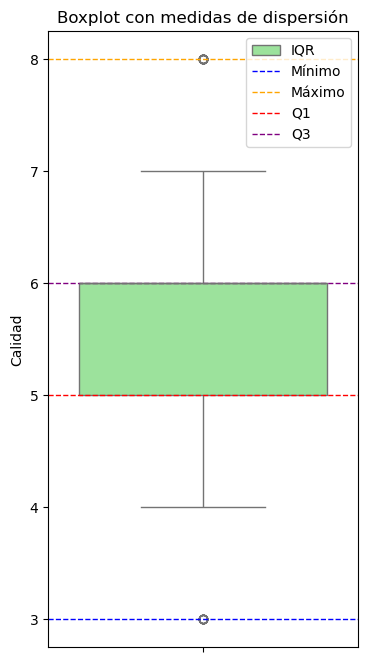

In [114]:
# Gráfica de caja vertical
plt.figure(figsize=(4, 8))
sns.boxplot(y=df_raw['quality'], color='lightgreen', orient='y')
plt.axhline(min_qa, color='blue', linestyle='dashed', linewidth=1, label='Mínimo')
plt.axhline(max_qa, color='orange', linestyle='dashed', linewidth=1, label='Máximo')
plt.axhline(q1_qa, color='red', linestyle='dashed', linewidth=1, label='Q1')
plt.axhline(q3_qa, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.legend(['IQR', 'Mínimo', 'Máximo', 'Q1', 'Q3'])
plt.title('Boxplot con medidas de dispersión')
plt.ylabel('Calidad')
plt.show()

## Nivel de alcohol

In [ ]:
# Análisis con base a la columna de 'alcohol' calidad.
media_al = df_raw['alcohol'].mean()
mediana_al = df_raw['alcohol'].median()
moda_al = df_raw['alcohol'].mode().iloc[0]

print(f"Medidas de tendencia central para la columna 'alcohol':")
print(f"Media: {media_al:.3f}")
print(f"Mediana: {mediana_al:.3f}")
print(f"Moda: {moda_al:.3f}")

Medidas de tendencia central para la columna 'alcohol':
Media: 10.423
Mediana: 10.200
Moda: 9.500


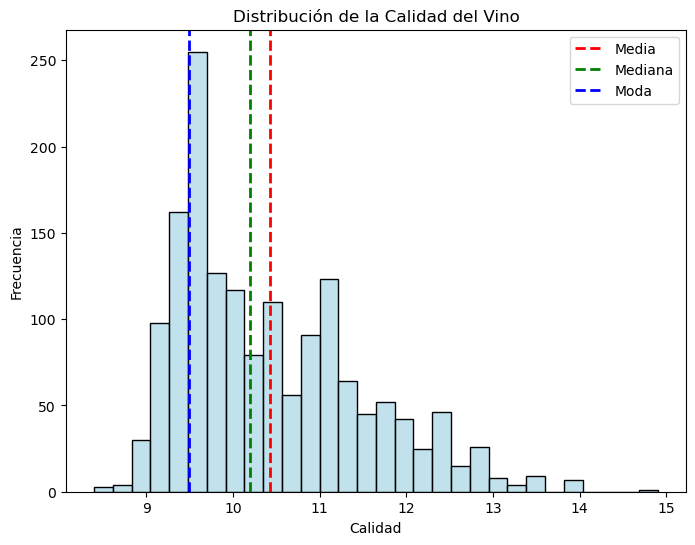

In [98]:
plt.figure(figsize=(8, 6))
sns.histplot(df_raw['alcohol'], bins=30, color='lightblue')
plt.axvline(media_al, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mediana_al, color='green', linestyle='dashed', linewidth=2, label='Mediana')
plt.axvline(moda_al, color='blue', linestyle='dashed', linewidth=2, label='Moda')
plt.legend(['Media', 'Mediana', 'Moda'])
plt.title('Distribución de la Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

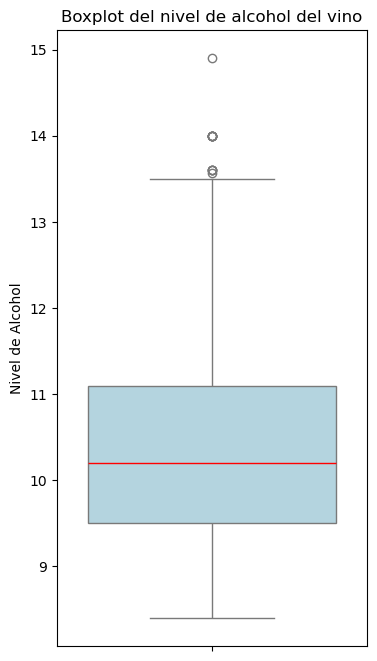

In [103]:
# Gráfica de caja vertical
plt.figure(figsize=(4, 8))
sns.boxplot(y=df_raw['alcohol'], color='lightblue', orient='y', medianprops={'color': 'red'})
plt.title('Boxplot del nivel de alcohol del vino')
plt.ylabel('Nivel de Alcohol')
plt.show()

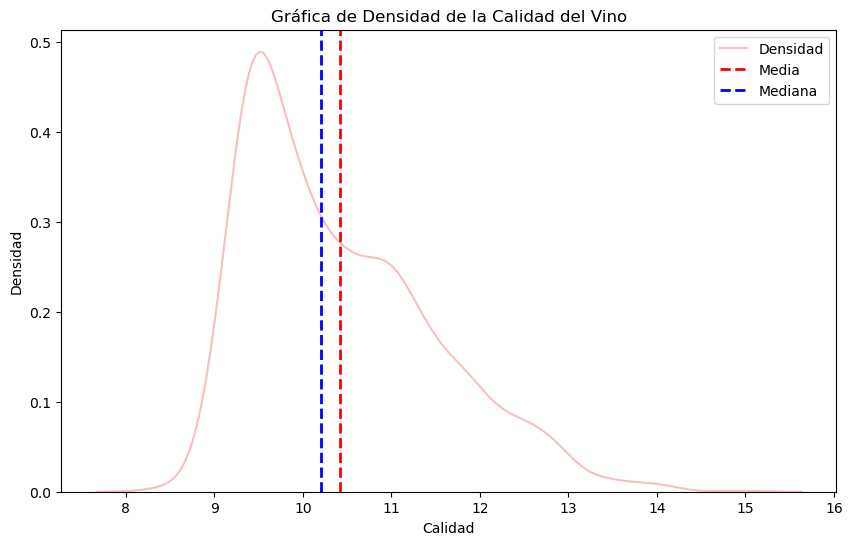

In [104]:
# Gráfica de densidad
plt.figure(figsize=(10, 6))
sns.kdeplot(df_raw['alcohol'], fill=False, color='lightcoral', alpha=0.5)
plt.axvline(media_al, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.axvline(mediana_al, color='blue', linestyle='dashed', linewidth=2, label='Mediana')
plt.title('Gráfica de Densidad de la Calidad del Vino')
plt.legend(['Densidad', 'Media', 'Mediana'])
plt.xlabel('Calidad')
plt.ylabel('Densidad')
plt.show()

### Medidas de dispersión

In [115]:
min_al = df_raw['alcohol'].min()
max_al = df_raw['alcohol'].max()
range_al = max_al - min_al
variance_al = df_raw['alcohol'].var()
std_dev_al = df_raw['alcohol'].std()
q3_al = df_raw['alcohol'].quantile(0.75)
q1_al = df_raw['alcohol'].quantile(0.25)
iqr_al = q3_al - q1_al
print(f"Medidas de dispersión para la columna 'alcohol':")
print(f"Mínimo: {min_al:.2f}, Máximo: {max_al:.2f}, Rango: {range_al:.2f}")
print(f"Varianza: {variance_al:.2f}, Desv. Estándar: {std_dev_al:.2f}")
print(f"Q1: {q1_al:.2f}, Q3: {q3_al:.2f}, IQR: {iqr_al:.2f}")

Medidas de dispersión para la columna 'alcohol':
Mínimo: 8.40, Máximo: 14.90, Rango: 6.50
Varianza: 1.14, Desv. Estándar: 1.07
Q1: 9.50, Q3: 11.10, IQR: 1.60


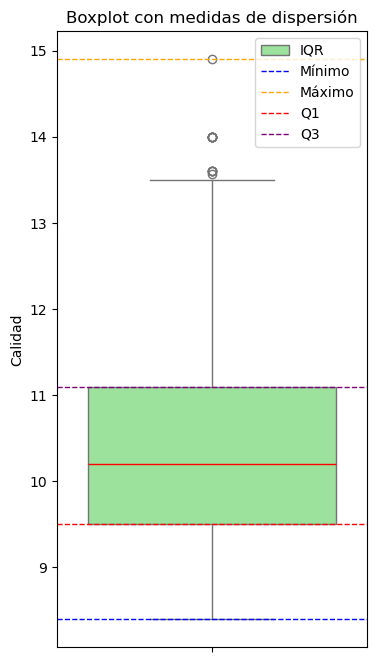

In [117]:
# Gráfica de caja vertical
plt.figure(figsize=(4, 8))
sns.boxplot(y=df_raw['alcohol'], color='lightgreen', orient='y', medianprops={'color': 'red'})
plt.axhline(min_al, color='blue', linestyle='dashed', linewidth=1, label='Mínimo')
plt.axhline(max_al, color='orange', linestyle='dashed', linewidth=1, label='Máximo')
plt.axhline(q1_al, color='red', linestyle='dashed', linewidth=1, label='Q1')
plt.axhline(q3_al, color='purple', linestyle='dashed', linewidth=1, label='Q3')
plt.legend(['IQR', 'Mínimo', 'Máximo', 'Q1', 'Q3'])
plt.title('Boxplot con medidas de dispersión')
plt.ylabel('Calidad')
plt.show()

### 